# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [61]:
df = pd.read_csv('Data.csv', parse_dates=['objReady100PercDt'], infer_datetime_format=True)
df.head()

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,complexShortNm,developer.bankruptStage,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,13383,28105,72,г Тюмень,4,20,68,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,28101,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/dictionary/regions'
res = requests.get(url)
region = res.json()

In [63]:
names = {}
for reg in region:
    names[reg['id']] = reg['name']
df['region'] = df['region'].apply(lambda x: names[x])

In [64]:
pd.set_option('display.max_rows', 100)
df['region'].value_counts()

Краснодарский край                 454
Город Москва                       443
Город Санкт-Петербург              417
Новосибирская область              369
Московская область                 330
Ленинградская область              188
Приморский край                    177
Свердловская область               140
Ростовская область                 127
Иркутская область                  109
Республика Татарстан                98
Республика Башкортостан             97
Калининградская область             94
Тюменская область                   94
Ставропольский край                 80
Удмуртская Республика               76
Вологодская область                 76
Воронежская область                 73
Тульская область                    72
Самарская область                   69
Челябинская область                 66
Нижегородская область               66
Красноярский край                   56
Владимирская область                54
Хабаровский край                    54
Алтайский край           

Удалим области, с количеством домов <6, поскольку некорректно судить по области основываясь на таком малом количестве данных

In [39]:
for name in ['Республика Алтай', 'Кабардино-Балкарская Республика', 'Новгородская область', 'Республика Мордовия', 'Забайкальский край']:
    df = df.loc[df['region'] != name]

In [9]:
price = df.loc[df['objPriceAvg'].notna()].groupby('region')['objPriceAvg'].mean()

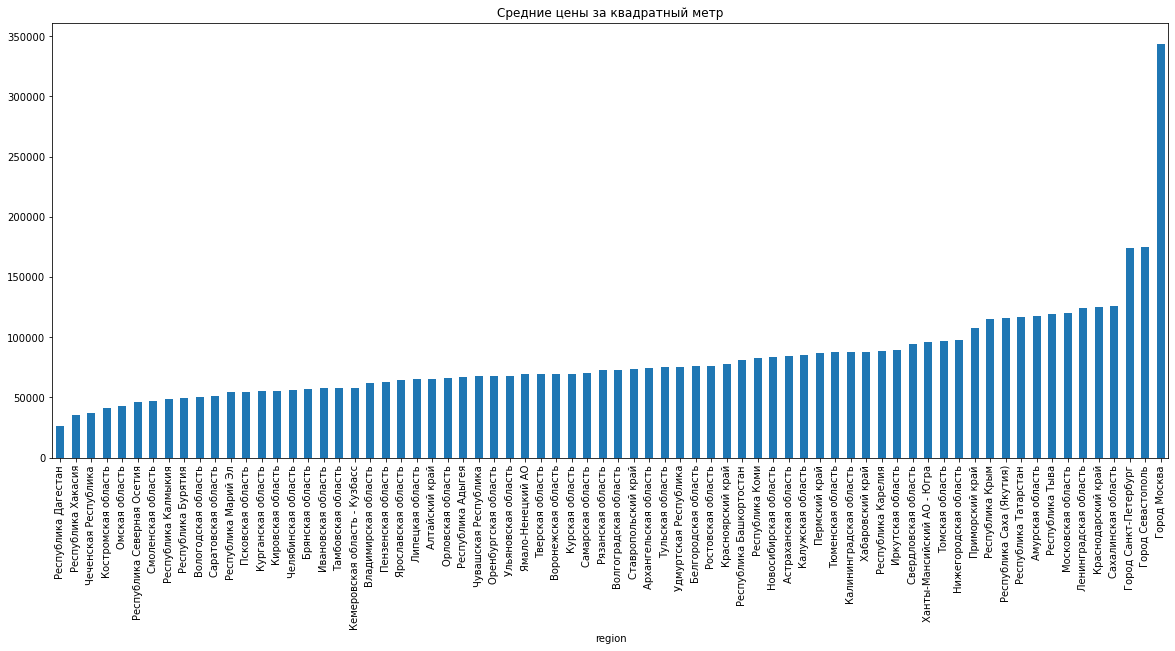

In [10]:
plt.subplots(figsize=(20, 8))
price.sort_values().plot(kind='bar')
plt.title('Средние цены за квадратный метр')
plt.show()

По скольку присутствуют дома с очень большой стоимостью (особенно в Москве), которые увеличивают среднее значение, лучше посмотерть медиану

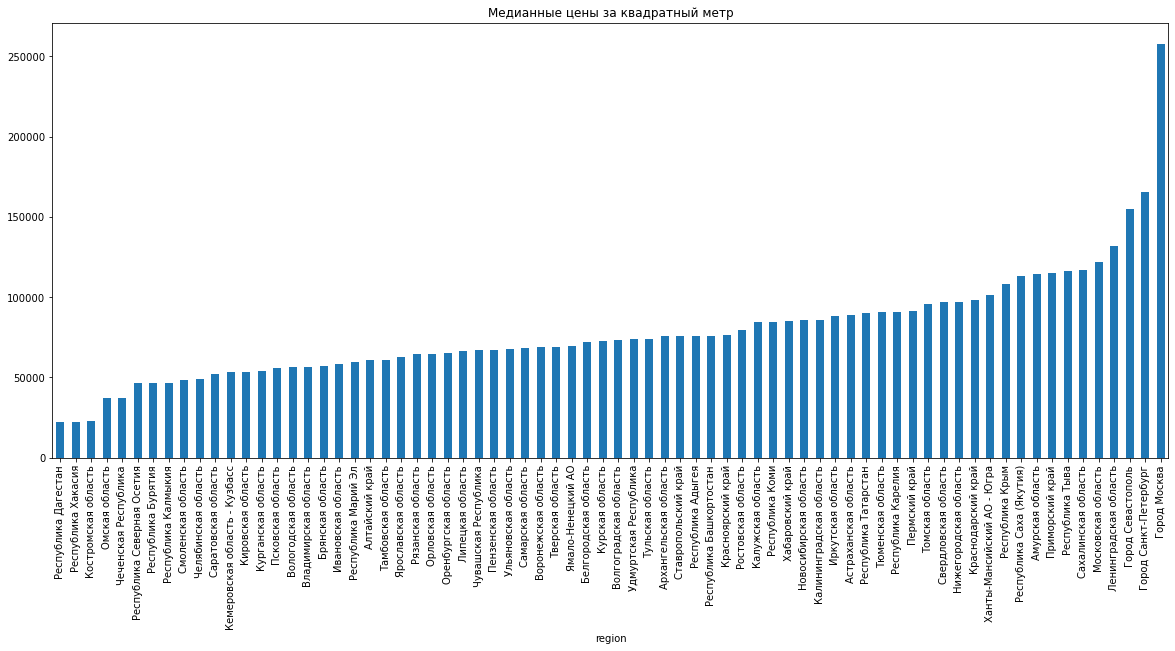

In [11]:
price = df.loc[df['objPriceAvg'].notna()].groupby('region')['objPriceAvg'].median()
plt.subplots(figsize=(20, 8))
price.sort_values().plot(kind='bar')
plt.title('Медианные цены за квадратный метр')
plt.show()

In [48]:
volume_region = df.groupby('region')['region'].count()

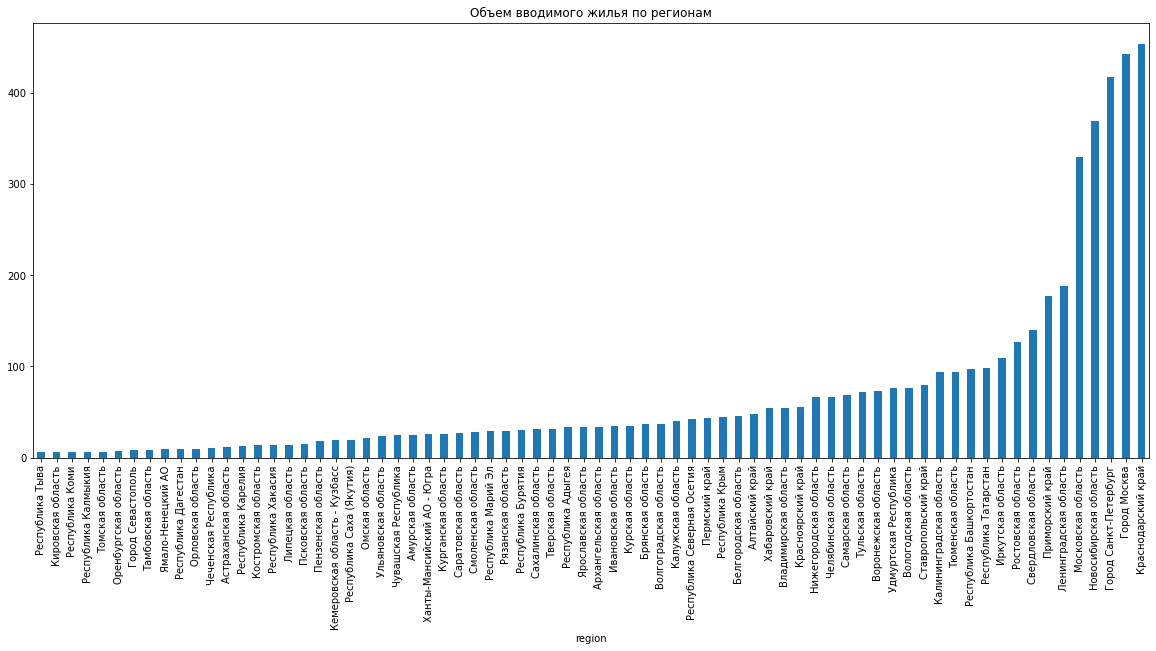

In [49]:
plt.subplots(figsize=(20, 8))
volume_region.sort_values().plot(kind='bar')
plt.title('Объем вводимого жилья по регионам')
plt.show()

In [50]:
years = pd.DataFrame(df['objReady100PercDt'].dt.year)
volume_years = years.groupby('objReady100PercDt')['objReady100PercDt'].count()

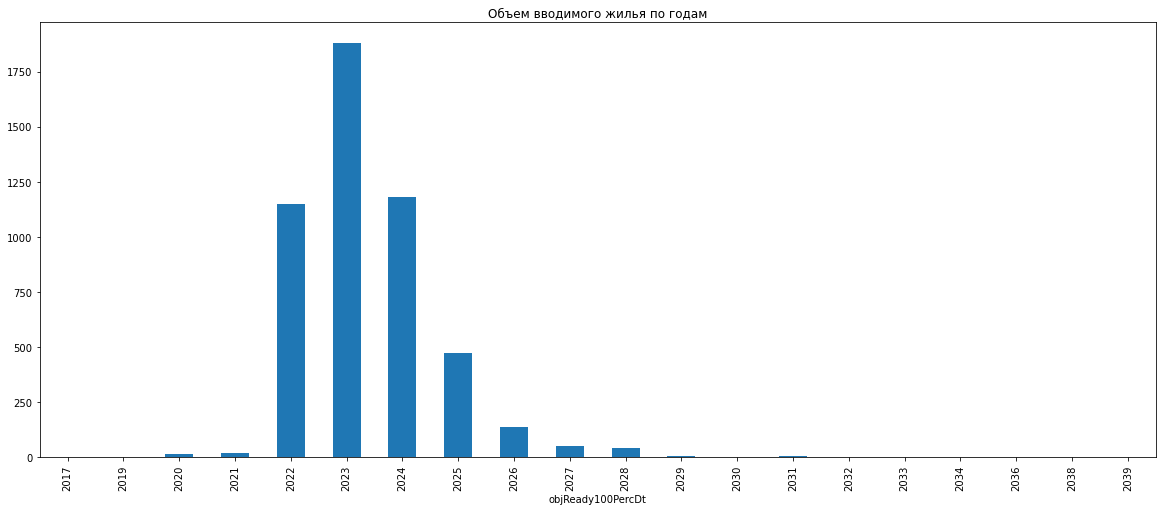

In [51]:
plt.subplots(figsize=(20, 8))
volume_years.plot(kind='bar')
plt.title('Объем вводимого жилья по годам')
plt.show()

In [52]:
floors = df.loc[df['objFloorCnt'].notna()].groupby('region')['objFloorCnt'].mean()

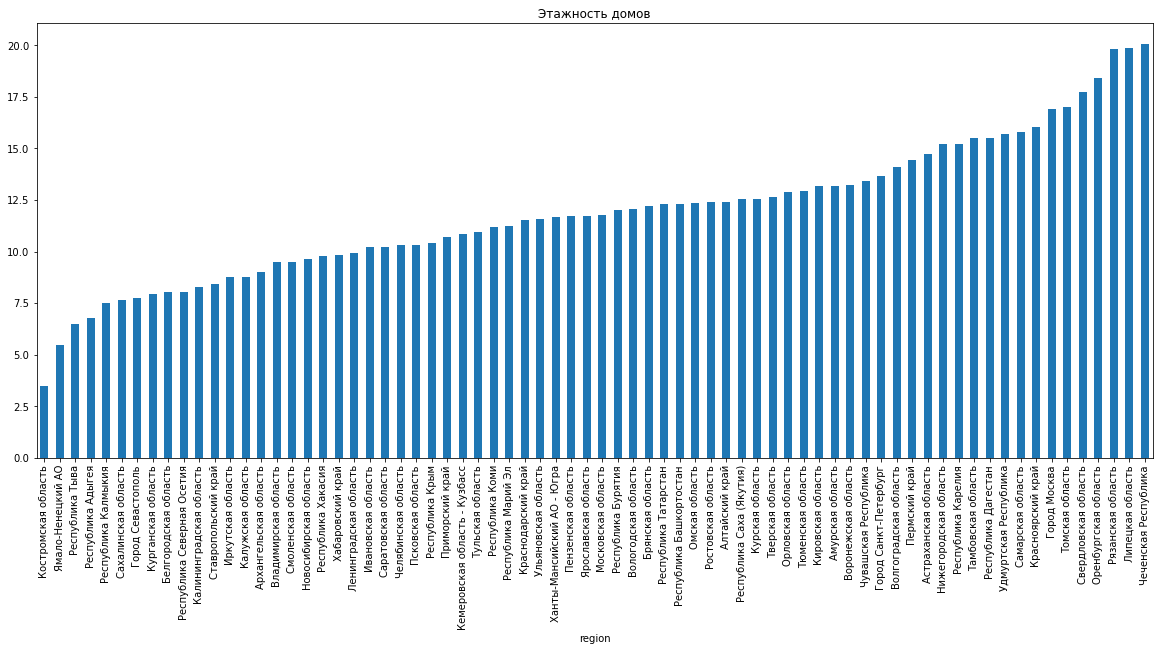

In [53]:
plt.subplots(figsize=(20, 8))
floors.sort_values().plot(kind='bar')
plt.title('Этажность домов')
plt.show()

In [54]:
flats = df.loc[df['objFlatCnt'].notna()].groupby('region')['objFlatCnt'].mean()

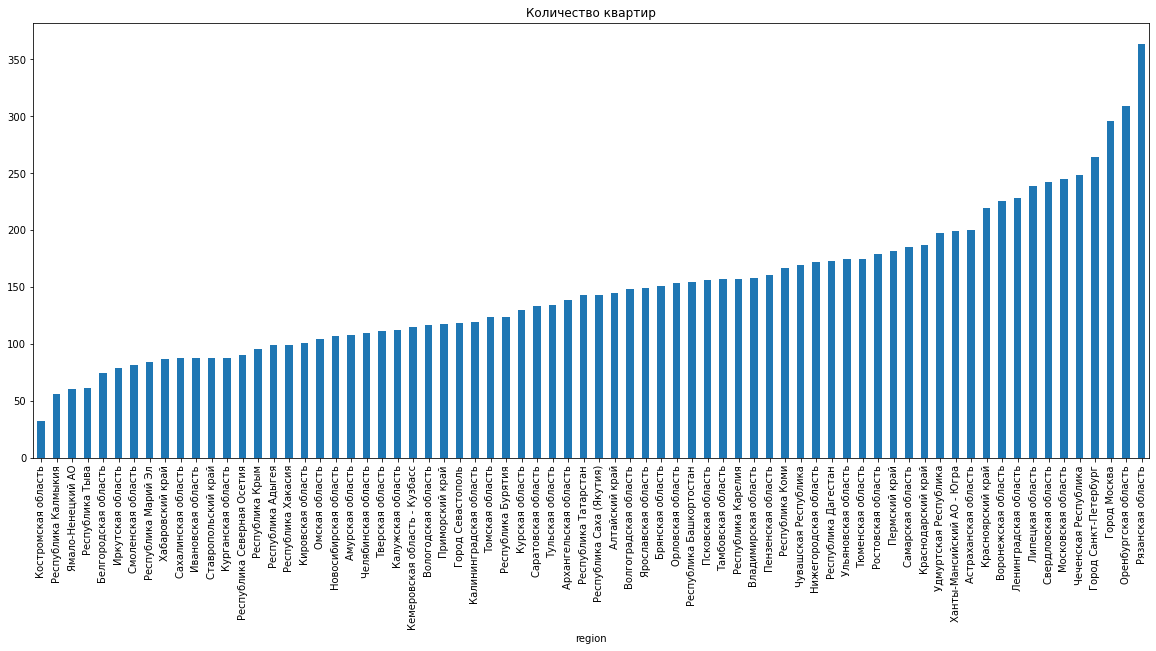

In [55]:
plt.subplots(figsize=(20, 8))
flats.sort_values().plot(kind='bar')
plt.title('Количество квартир')
plt.show()

In [56]:
area = df.loc[df['objSquareLiving'].notna()].groupby('region')['objSquareLiving'].mean()

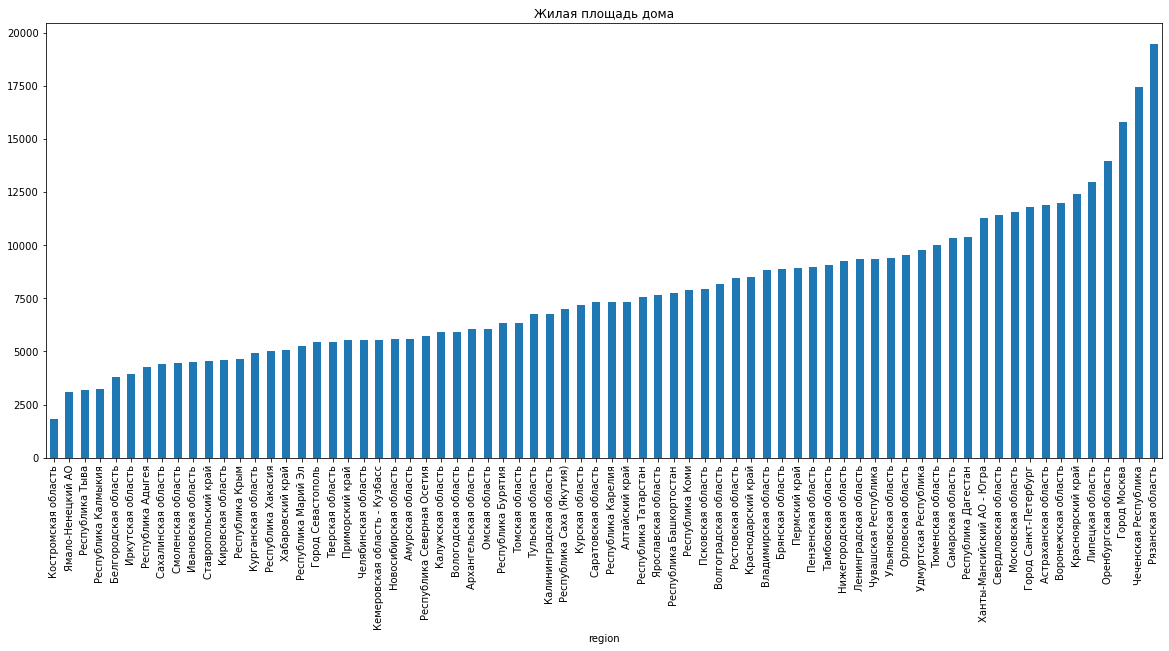

In [57]:
plt.subplots(figsize=(20, 8))
area.sort_values().plot(kind='bar')
plt.title('Жилая площадь дома')
plt.show()

In [58]:
parking = df.loc[df['objElemParkingCnt'].notna()].groupby('region')['objElemParkingCnt'].mean()

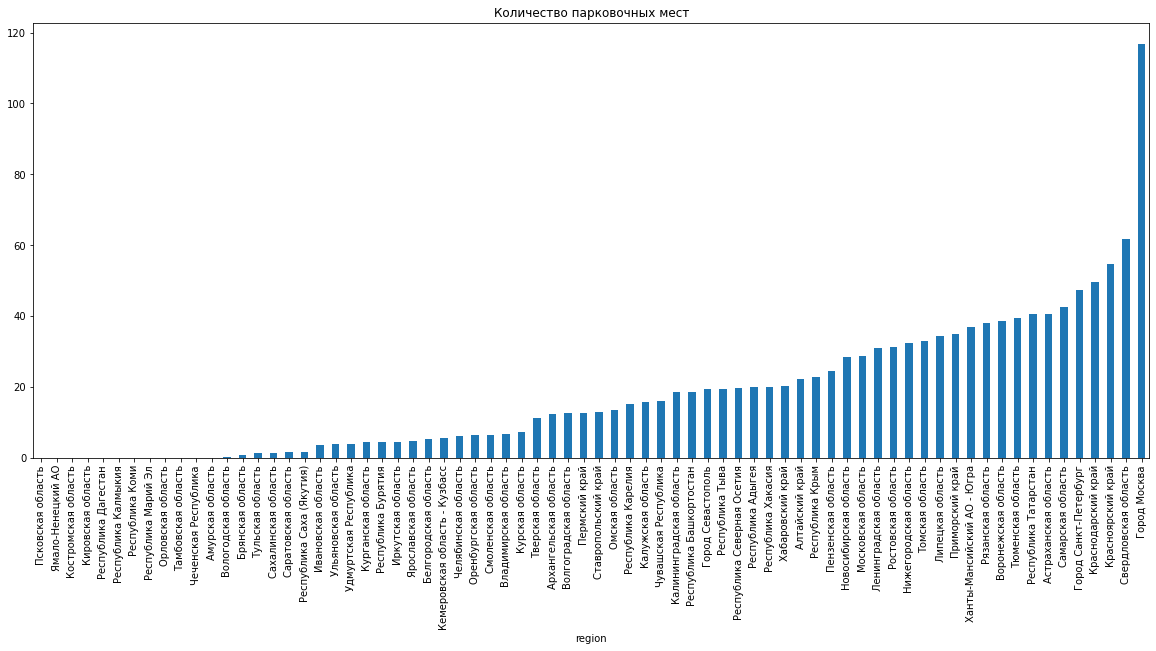

In [59]:
plt.subplots(figsize=(20, 8))
parking.sort_values().plot(kind='bar')
plt.title('Количество парковочных мест')
plt.show()

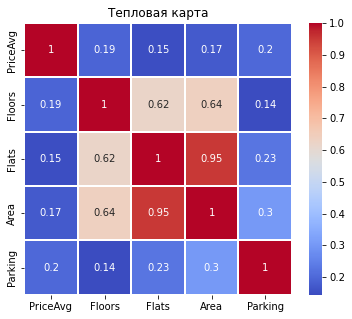

In [45]:
df2 = df[['objPriceAvg', 'objFloorCnt', 'objFlatCnt', 'objSquareLiving', 'objElemParkingCnt']].copy()
df2.rename(columns = {'objPriceAvg' : 'PriceAvg', 'objFlatCnt': 'Flats', 'objFloorCnt' : 'Floors', 'objSquareLiving': 'Area',
                     'objElemParkingCnt': 'Parking'}, inplace = True)
plt.subplots(figsize=(6, 5))
sns.heatmap(df2[['PriceAvg', 'Floors', 'Flats', 'Area', 'Parking']].corr(), linewidths=.01, cmap='coolwarm', annot=True)
plt.title('Тепловая карта')
plt.show()